In [296]:
import numpy as np
import matplotlib.pyplot as plt

# Random Number Generator

In [297]:
def sampleGaussian(mean, var):
    # Box–Muller method
    u, v = np.random.uniform(size=2)
    
    x = (-2 * np.log(u)) ** 0.5 * np.cos(2 * np.pi * v)
    # y = (-2 * np.log(u)) ** 0.5 * np.sin(2 * np.pi * v)
    
    return mean + x * var ** 0.5

# Optimizer / Gradient Function

In [298]:
def optimize(w, gradient, lr=0.01, eps=1e-2):
    if np.linalg.norm(gradient) <= eps:
        return False # converged
    w -= lr * gradient
    return True # stepped

In [299]:
def calculateGradient(X, y, w, mode='grad'):
    if mode == 'grad':
        return -X.T @ (y - 1 / (1 + np.exp(-X @ w)))
    
    if mode == 'newton':
        N = X.shape[0]
        D = np.zeros((N, N))
        
        for i in range(N):
            D[i, i] = np.exp(-X[i] @ w) / (1 + np.exp(-X[i] @ w)) ** 2
        
        H = X.T @ D @ X
        
        if np.linalg.matrix_rank(H) < H.shape[0]:
            print('H is singular.')
            return calculateGradient(X, y, w)
        
        return np.linalg.inv(H) @ calculateGradient(X, y, w)

# Console Output Function

In [300]:
def consoleOutput(X, y, w):
    # gradient descent
    print('Gradient descent:\n')
    print('w:')
    for i in range(3):
        print('{:> 9.4f}'.format(w['grad'][i].item()))

    # confusion matrix
    pred = np.where(X @ w['grad'] <= 0, 0, 1)
    cm = np.zeros((2, 2), dtype=np.int)
    for i in range(2):
        for j in range(2):
            cm[i, j] = np.count_nonzero((y == i) & (pred == j))

    print('\nConfusion Matrix:')
    print('\t\tPredict cluster 1\tPredict cluster 2')
    print(f'Is cluster 1\t\t{cm[0, 0]}\t\t\t{cm[0, 1]}')
    print(f'Is cluster 2\t\t{cm[1, 0]}\t\t\t{cm[1, 1]}\n')

    print(f'Sensitivity (Successfully predict cluster 1): {cm[0, 0] / (cm[0, 0] + cm[0, 1]):.5f}')
    print(f'Specificity (Successfully predict cluster 2): {cm[1, 1] / (cm[1, 0] + cm[1, 1]):.5f}')
    print('\n----------------------------------------')


    # Newton's method
    print('Newton\'s method:\n')
    print('w:')
    for i in range(3):
        print('{:> 9.4f}'.format(w['newton'][i].item()))

    # confusion matrix
    pred = np.where(X @ w['newton'] <= 0, 0, 1)
    cm = np.zeros((2, 2), dtype=np.int)
    for i in range(2):
        for j in range(2):
            cm[i, j] = np.count_nonzero((y == i) & (pred == j))

    print('\nConfusion Matrix:')
    print('\t\tPredict cluster 1\tPredict cluster 2')
    print(f'Is cluster 1\t\t{cm[0, 0]}\t\t\t{cm[0, 1]}')
    print(f'Is cluster 2\t\t{cm[1, 0]}\t\t\t{cm[1, 1]}\n')

    print(f'Sensitivity (Successfully predict cluster 1): {cm[0, 0] / (cm[0, 0] + cm[0, 1]):.5f}')
    print(f'Specificity (Successfully predict cluster 2): {cm[1, 1] / (cm[1, 0] + cm[1, 1]):.5f}')

# Plot Figure Function

In [301]:
def plot(X, y, w):
    plt.figure(figsize=(10, 8))

    gt = plt.subplot(1, 3, 1)
    grad = plt.subplot(1, 3, 2)
    newton = plt.subplot(1, 3, 3)

    # title
    gt.set_title('Ground truth')
    grad.set_title('Gradient descent')
    newton.set_title('Newton\'s method')


    # plot gt
    gt.plot(X[:N, 0], X[:N, 1], 'ro')
    gt.plot(X[-N:, 0], X[-N:, 1], 'bo')


    # plot grad
    pred = (X @ w['grad']).reshape(-1)
    grad.plot(X[pred <= 0, 0], X[pred <= 0, 1], 'ro')
    grad.plot(X[pred > 0, 0], X[pred > 0, 1], 'bo')

    # decision boundary
#     x = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))
#     grad.plot(x, -(w['grad'][2] + w['grad'][0] * x) / w['grad'][1])


    # plot neweton
    pred = (X @ w['newton']).reshape(-1)
    newton.plot(X[pred <= 0, 0], X[pred <= 0, 1], 'ro')
    newton.plot(X[pred > 0, 0], X[pred > 0, 1], 'bo')

    # decision boundary
#     x = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))
#     newton.plot(x, -(w['newton'][2] + w['newton'][0] * x) / w['newton'][1])

    plt.show()

# Logistic Regression

In [306]:
# case 1
N = 50
mx1 = my1 = 1
mx2 = my2 = 10
vx1 = vy1 = vx2 = vy2 = 2

In [303]:
# case 2
N = 50
mx1 = my1 = 1
mx2 = my2 = 3
vx1 = vy1 = 2
vx2 = vy2 = 4

In [307]:
# generate data
X = np.ones((2 * N, 3))
y = np.empty((2 * N, 1))

for i in range(2 * N):
    if i < N: # class 0
        X[i][0] = sampleGaussian(mx1, vx1)
        X[i][1] = sampleGaussian(my1, vy1)
        y[i][0] = 0
    else: # class 1
        X[i][0] = sampleGaussian(mx2, vx2)
        X[i][1] = sampleGaussian(my2, vy2)
        y[i][0] = 1


# initialize parameters
w = {'grad': None, 'newton': None}
w['grad'] = np.zeros((3, 1))
w['newton'] = np.zeros((3, 1))


# fit
# calculate gradient and optimize w (gradient descent)
i = 0
while optimize(w['grad'], calculateGradient(X, y, w['grad'])): i += 1
print(f'Gradient Descent:\tConverged in {i} iterations.')


# calculate gradient and optimize w (Newton's method)
i = 0
while optimize(w['newton'], calculateGradient(X, y, w['newton'], mode='newton'), lr=1): i += 1
print(f'Newton\'s Method:\tConverged in {i} iterations.')


Gradient Descent:	Converged in 19381 iterations.
Newton's Method:	Converged in 236 iterations.


Gradient descent:

w:
   1.5996
   0.9283
 -13.8013

Confusion Matrix:
		Predict cluster 1	Predict cluster 2
Is cluster 1		50			0
Is cluster 2		0			50

Sensitivity (Successfully predict cluster 1): 1.00000
Specificity (Successfully predict cluster 2): 1.00000

----------------------------------------
Newton's method:

w:
  12.3490
   6.7481
-116.4484

Confusion Matrix:
		Predict cluster 1	Predict cluster 2
Is cluster 1		50			0
Is cluster 2		0			50

Sensitivity (Successfully predict cluster 1): 1.00000
Specificity (Successfully predict cluster 2): 1.00000


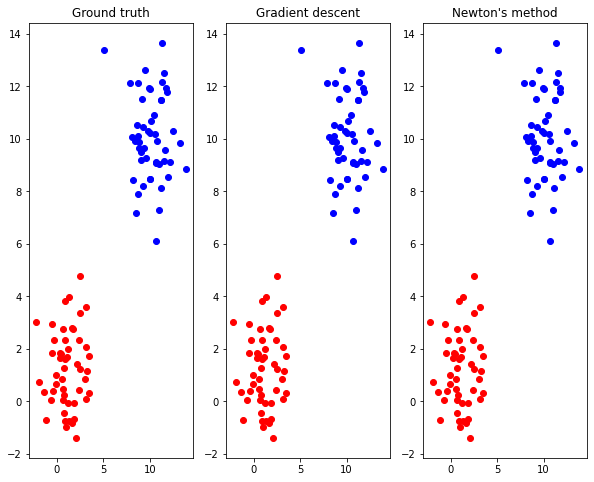

In [308]:
consoleOutput(X, y, w)
plot(X, y, w)